# k-Nearest Neighbors Optimization

In this exercise, you will train multiple KNN Classification models using using different values of hyperparameter K and compare the accuracy of each model. You will train the KNN models on "cell2cell" -- a telecom company churn prediction data set.


## Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the Scikit-learn `KNeighborsClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the metric `accuracy_score` to evaluate our model.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1. Build the DataFrame and Define the ML Problem

####  Load a Data Set and Save it as a Pandas DataFrame

We will work with a version of the "cell2cell" data set called "cell2celltrain." This data set has already been prepared with some of the data preparation techniques that you practiced in Unit 2 and is ready for modeling. Namely, the data contains proper data types, and has had outliers and missing values taken care of. In addition, all numerical columns have been scaled to the [0, 1] interval.

In [3]:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)


#### Inspect the Data

In [4]:
df.shape

(51047, 58)

In [5]:
df.head()

,CustomerID,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,True,SEAPOR503,False,False,True,False,False,True,True,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,True,PITHOM412,True,False,False,False,False,True,True,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,False,MILMIL414,True,False,False,False,False,False,False,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,False,PITHOM412,False,False,True,False,False,True,True,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,True,OKCTUL918,False,False,False,False,False,True,True,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


#### Define the Label

Assume that your goal is to train a machine learning model that predicts a telecommunication company's customer churn. That is, it predicts whether a customer will remain with that telecommunications service or leave to another. This is an example of supervised learning and is a binary classification problem; it requires a label that contains a categorical value. In our dataset, our label will be the `Churn` column and the label will either contain the value `True` or `False`. Let's inspect the `Churn` column.

In [6]:
df['Churn']

0         True
1         True
2        False
3        False
4         True
         ...  
51042     True
51043    False
51044     True
51045    False
51046    False
Name: Churn, Length: 51047, dtype: bool

#### Identify Features

Our features can be all of the remaining columns in the dataset with one exception: to implement a k-nearest neighbors model, we must use features that allow us to compute the distance. This means we can only features that are not of string-value. Although we can perform feature engineering, such as one-hot encoding, to transform these features into numerical ones, for the purpose of this exercise, we will simply remove these features (columns).

Inspect the data type of each column in the code cell below.

In [7]:
df.dtypes

CustomerID                     int64
Churn                           bool
ServiceArea                   object
ChildrenInHH                    bool
HandsetRefurbished              bool
HandsetWebCapable               bool
TruckOwner                      bool
RVOwner                         bool
HomeownershipKnown              bool
BuysViaMailOrder                bool
RespondsToMailOffers            bool
OptOutMailings                  bool
NonUSTravel                     bool
OwnsComputer                    bool
HasCreditCard                   bool
NewCellphoneUser                bool
NotNewCellphoneUser             bool
OwnsMotorcycle                  bool
MadeCallToRetentionTeam         bool
CreditRating                  object
PrizmCode                     object
Occupation                    object
Married                       object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
O

The code cell below finds all columns of type `object`. 

In [8]:
to_exclude = list(df.select_dtypes(include=['object']).columns)
print(to_exclude)

['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation', 'Married']


The code cell below removes these columns.

In [9]:
df.drop(columns = to_exclude, axis = 1, inplace=True)

In [10]:
df.shape

(51047, 53)

In [11]:
df.columns

Index(['CustomerID', 'Churn', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
    

## Step 2: Create Labeled Examples from the Data Set for the Model Training Phase

Let's obtain columns from our data set to create labeled examples. 
The code cell below carries out the following steps:

* Gets the `Churn` column from DataFrame `df` and assigns it to the variable `y`. This is our label.
* Gets all other columns from DataFrame `df` and assigns them to the variable `X`. These are our features. 

Execute the code cell below and inspect the results. You will see that we have 51047 labeled examples. Each example contains 52 features and one label (`Churn`).


In [12]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))



Number of examples: 51047

Number of Features:52
['CustomerID', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCre

## Step 3. Create Training and Test Data Sets

Now that we have specified examples, we will need to split them into a training set that we will use to train our model, and a test set, which we will use to understand the performance of our model on new data. To do so, we will use the `train_test_split()` function from `sklearn`.

In the code cell below, use the `train_test_split()` function to create training and test sets. Consult the previous "KNN Demo" exercise to refresh your memory on how to accomplish this, or consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for the `train_test_split()` function.

You will call `train_test_split()` function with the following arguments:
    
1. Feature DataFrame `X`.
2. Label DataFrame `Y`.
3. A test set that is a third of the size of the data set. More specifically, use the parameter `test_size=0.33`.
4. A seed value of `1234`. More specifically, use the parameter `random_state=1234`.
    
The `train_test_split()` method will return four outputs (data subsets). Assign these outputs to the following variable names, using the following order:  `X_train`, `X_test`, `y_train`, `y_test`. 

Note that you will be able to accomplish this using one line of code.

## Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [14]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testSplit

try:
    p, err = testSplit(X_train, X_test, y_train, y_test, df)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    


Correct!


#### Get the Dimensions of the Training and Test Data Sets

In [15]:
X_train.shape

(34201, 52)

In [16]:
X_test.shape

(16846, 52)

####  Glance at the Training Data

In [17]:
X_train.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
10351,3081630,True,False,True,True,True,True,True,True,False,...,-0.616775,1.826064,0.210998,-0.883541,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.368174
33816,3269538,False,False,True,True,False,True,True,True,False,...,-0.616775,-0.167636,1.116204,0.202910,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.368174
36668,3292822,False,False,True,False,False,False,False,False,False,...,-0.616775,0.104233,-1.418373,-0.883541,-0.180167,-0.1283,-0.169283,-1.378025,-0.140707,-0.368174
12787,3100870,True,False,True,False,False,True,True,True,False,...,0.487071,-0.782294,1.025683,1.289361,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.864858
2635,3020642,False,False,True,False,False,True,False,False,False,...,-0.616775,3.019920,0.120477,-0.883541,-0.180167,-0.1283,-0.169283,1.489856,-0.140707,-0.368174


## Step 4: Train and Evaluate the Model: 
### Fit a KNN Classification Model and Evaluate the Model's Accuracy

The code cell below contains a shell of a function named `train_test_knn()`. This function should train a KNN classifier on the training data, test the resulting model on the test data, and compute and return the accuracy score of the resulting predicted class labels on the test data. The accuracy score is a fraction between 0 and 1 indicating the fraction of predictions that match the true value in the test set.


Your task is to fill in the function to make it work.

Inspect the function definition `train_test_knn(X_train, X_test, y_train, y_test, k)`. The function expects the test and train datasets as well as a value for hyperparameter k - the number of neighbors. Note that by default, the Scikit-learn `KNeighborsClassifier` class uses the Euclidean distance as its distance function.

In the code cell below:

1. Use ```KNeighborsClassifier()``` to create a model object, and assign the result to the variable ```model```.  Call the method with one parameter: `n_neighbors = k`. 
<br>
2. Call the ```model.fit()``` method to fit the model to the training data. The first argument should be ```X_train``` and the second argument should be ```y_train```.
<br>
3. Call the ```model.predict()``` method  with the argument ```X_test``` to use the fitted model to predict values for the test data. Store the outcome in the variable ```class_label_predictions```.
<br>
4. Call the ```accuracy_score()``` function; the first argument should be `y_test` and the second argument should be `class_label_predictions`. Assign the result to variable `acc_score`.
<br>



You might find it useful to consult the "KNN Demo" exercise or the `KNeighborsClassifier` Scikit-learn online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for a refresher on how to accomplish these tasks.


## Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [22]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    model = KNeighborsClassifier(n_neighbors=3)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train) 
 
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_precictions = model.predict(X_test) 

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_precictions)
    
    return acc_score

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [23]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testFunction

try:
    p, err = testFunction(train_test_knn, df)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 5: Train and Evaluate Different KNN Models Using Different Values of Hyperparameter K

For a fixed data set and a chosen distance function, varying the value of the parameter `k` may have a substantial effect on the performance of the model. The optimal value of `k` depends on the data. <br>
    
Running the code below will train three KNN classifiers using the `train_test_knn()` function just implemented, and using three values of `k`: $10$, $100$, and $1000$. <br>It will print the accuracy score of each model and save the scores to list `acc1`. This may take a few seconds.


In [24]:
k_values = [10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))
    

k=10, accuracy score: 0.6251335628635878
k=100, accuracy score: 0.6251335628635878
k=1000, accuracy score: 0.6251335628635878


Next we will train three more KNN classifiers for the same values of `k`, but this time using only a subset of the training data -- just the first 1500 examples.

In [25]:
k_values = [10, 100, 1000]

acc2 = [] 

for k in k_values:
    score = train_test_knn(X_train[:1500], X_test, y_train[:1500], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))

    

k=10, accuracy score: 0.6184257390478451
k=100, accuracy score: 0.6184257390478451
k=1000, accuracy score: 0.6184257390478451


Let's visualize the results:

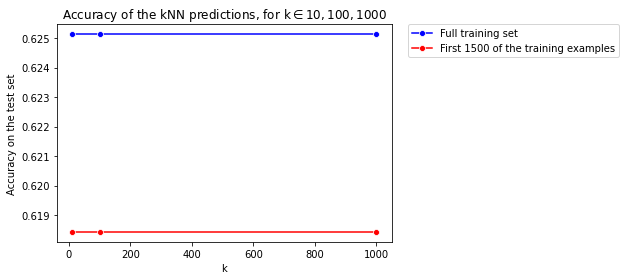

In [26]:
# Visualizing accuracy:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=acc1, color='b', marker='o', label = 'Full training set')
p2 = sns.lineplot(x=k_values, y=acc2, color='r', marker='o', label = 'First 1500 of the training examples')

plt.title('Accuracy of the kNN predictions, for k$\in{10,100,1000}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

Let's work with more than three values of `k`. 

The code bellow trains 40 KNN classifiers with different values of `k` (1-40). 
Inspect the accuracy scores and note the optimal value for $k$.

This may take a while to compute -- we are fitting ~40 models!

In [27]:
acc1_40 = [] 
print("Accuracy scores for full training data:")
for k in range(1,41):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1_40.append(float(score))
    


Accuracy scores for full training data:
k=1, accuracy score: 0.6251335628635878
k=2, accuracy score: 0.6251335628635878
k=3, accuracy score: 0.6251335628635878
k=4, accuracy score: 0.6251335628635878
k=5, accuracy score: 0.6251335628635878
k=6, accuracy score: 0.6251335628635878
k=7, accuracy score: 0.6251335628635878
k=8, accuracy score: 0.6251335628635878
k=9, accuracy score: 0.6251335628635878
k=10, accuracy score: 0.6251335628635878
k=11, accuracy score: 0.6251335628635878
k=12, accuracy score: 0.6251335628635878
k=13, accuracy score: 0.6251335628635878
k=14, accuracy score: 0.6251335628635878
k=15, accuracy score: 0.6251335628635878
k=16, accuracy score: 0.6251335628635878
k=17, accuracy score: 0.6251335628635878
k=18, accuracy score: 0.6251335628635878
k=19, accuracy score: 0.6251335628635878
k=20, accuracy score: 0.6251335628635878
k=21, accuracy score: 0.6251335628635878
k=22, accuracy score: 0.6251335628635878
k=23, accuracy score: 0.6251335628635878
k=24, accuracy score: 0.62

The cell below accomplishes the same thing above, but using a subset of the data - the first 50 examples in the training set.

In [28]:
acc2_40 = []
print("\nAccuracy scores for 50 examples in training data:")
for k in range(1,41):
    score = train_test_knn(X_train[:50], X_test, y_train[:50], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2_40.append(float(score))
    




Accuracy scores for 50 examples in training data:
k=1, accuracy score: 0.49050219636709014
k=2, accuracy score: 0.49050219636709014
k=3, accuracy score: 0.49050219636709014
k=4, accuracy score: 0.49050219636709014
k=5, accuracy score: 0.49050219636709014
k=6, accuracy score: 0.49050219636709014
k=7, accuracy score: 0.49050219636709014
k=8, accuracy score: 0.49050219636709014
k=9, accuracy score: 0.49050219636709014
k=10, accuracy score: 0.49050219636709014
k=11, accuracy score: 0.49050219636709014
k=12, accuracy score: 0.49050219636709014
k=13, accuracy score: 0.49050219636709014
k=14, accuracy score: 0.49050219636709014
k=15, accuracy score: 0.49050219636709014
k=16, accuracy score: 0.49050219636709014
k=17, accuracy score: 0.49050219636709014
k=18, accuracy score: 0.49050219636709014
k=19, accuracy score: 0.49050219636709014
k=20, accuracy score: 0.49050219636709014
k=21, accuracy score: 0.49050219636709014
k=22, accuracy score: 0.49050219636709014
k=23, accuracy score: 0.4905021963

Let's visualize the resulting accuracy values, as before:

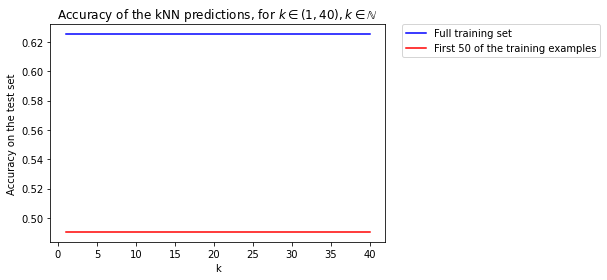

In [29]:
x = [i for i in range(1,41)]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = plt.plot(x, acc1_40, 'b-', label = 'Full training set')
p2 = plt.plot(x, acc2_40, 'r-', label = 'First 50 of the training examples') 

plt.title('Accuracy of the kNN predictions, for $k\in(1, 40), k\in\mathbb{N}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

You are encouraged to think about the takeaways from looking at these plots. See if you can decide what seems to be the optimal value of `k`. Think furthermore about what is the improvement in learning gained by having additional data.

## The Importance of Scaling

Note that Euclidean distance is *not* scale invariant. Features with higher norms will in general dominate the neighborhood. Hence, if the features with the highest norms are also *not* strongly predictive of the target variable, these features will harm the performance of the model. It is often best to rescale the features before running KNN. The dataset that you loaded for this exercise already has this step done.


